> STRUCTURED SEQUENCE MODELING WITH GRAPH CONVOLUTIONAL RECURRENT NETWORKS

# GCRN

> Seo, Youngjoo, et al. "Structured sequence modeling with graph convolutional recurrent networks." Neural Information Processing: 25th International Conference, ICONIP 2018, Siem Reap, Cambodia, December 13-16, 2018, Proceedings, Part I 25. Springer International Publishing, 2018.

- [arXiv](https://arxiv.org/abs/1612.07659)

This paper introduces Graph Convolutional Recurrent Network (GCRN), a deep learning model able to predict structured sequences of data. Precisely, GCRN is a generalization of classical recurrent neural networks (RNN) to data structured by an arbitrary graph. Such structured sequences can represent series of frames in videos, spatio-temporal measurements on a network of sensors, or random walks on a vocabulary graph for natural language modeling. The proposed model combines convolutional neural networks (CNN) on graphs to identify spatial structures and RNN to find dynamic patterns. We study two possible architectures of GCRN, and apply the models to two practical problems: predicting moving MNIST data, and modeling natural language with the Penn Treebank dataset. Experiments show that exploiting simultaneously graph spatial and dynamic information about data can improve both precision and learning speed.

본 논문은 구조화된 데이터 시퀀스를 예측할 수 있는 딥러닝 모델인 Graph Convolutional Recurrent Network (GCRN)에 대해 소개한다. GCRN은 임의의 그래프로 구조화된 데이터에 대한 고전적인 recurrnet neural network(RNN)의 일반화 버전이다.

제안된 모델은 convolutional neural networks(CNN)을 결합하여 공간 구조를 식별하고 동적 패턴을 찾는 RNN을 결합한다. 

본 논문에서는 GCRN의 두 가지 가능한 아키텍처를 연구하고 모델을 두 가지 실제 문제에 적용해본다. (moving-MNIST 데이터 예측, 펜트리뱅크 데이터 셋을 이용한 자연어 모델링)

실험에 따르면 데이터에 대한 그래프 공간 정보와 동적 정보를 동시에 활용하면 정밀도와 학습속도를 모두 향상시킬 수 있다고 한다.

## INTRODUCTION

Many real-world data can be cast as structured sequences, with spatio-temporal sequences being a special case. A well-studied example of spatio-temporal data are videos, where succeeding frames share temporal and spatial structures. Many works, such as Donahue et al. (2015); Karpathy & FeiFei (2015); Vinyals et al. (2015), leveraged a combination of CNN and RNN to exploit such spatial and temporal regularities. Their models are able to process possibly time-varying visual inputs for variable-length prediction. These neural network architectures consist of combining a CNN for visual feature extraction followed by a RNN for sequence learning. Such architectures have been successfully used for video activity recognition, image captioning and video description.
More recently, interest has grown in properly fusing the CNN and RNN models for spatio-temporal sequence modeling. Inspired by language modeling, Ranzato et al. (2014) proposed a model to represent complex deformations and motion patterns by discovering both spatial and temporal correlations. They showed that prediction of the next video frame and interpolation of intermediate frames can be achieved by building a RNN-based language model on the visual words obtained by quantizing the image patches. Their highest-performing model, recursive CNN (rCNN), uses convolutions for both inputs and states. Shi et al. (2015) then proposed the convolutional LSTM network (convLSTM), a recurrent model for spatio-temporal sequence modeling which uses 2D-grid convolution to leverage the spatial correlations in input data. They successfully applied their model to the
prediction of the evolution of radar echo maps for precipitation nowcasting.
The spatial structure of many important problems may however not be as simple as regular grids.


For instance, the data measured from meteorological stations lie on a irregular grid, i.e. a network of heterogeneous spatial distribution of stations. More challenging, the spatial structure of data may not even be spatial, as it is the case for social or biological networks. Eventually, the interpretation that
sentences can be regarded as random walks on vocabulary graphs, a view popularized by Mikolov et al. (2013), allows us to cast language analysis problems as graph-structured sequence models.

## PROPOSED GCRN MODELS

<https://pytorch-geometric-temporal.readthedocs.io/en/latest/_modules/torch_geometric_temporal/nn/recurrent/gconv_gru.html#GConvGRU.forward>

```python
class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features, filters):
        super(RecurrentGCN, self).__init__()
        self.recurrent = GConvGRU(node_features, filters, 2)
        self.linear = torch.nn.Linear(filters, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        return h
```

**classGConvGRU(in_channels: int, out_channels: int, K: int, normalization: str = 'sym', bias: bool = True)**

An implementation of the Chebyshev Graph Convolutional Gated Recurrent Unit Cell.

```python
import torch
from torch_geometric.nn import ChebConv


[docs]class GConvGRU(torch.nn.Module):
    r"""An implementation of the Chebyshev Graph Convolutional Gated Recurrent Unit
    Cell. For details see this paper: `"Structured Sequence Modeling with Graph
    Convolutional Recurrent Networks." <https://arxiv.org/abs/1612.07659>`_

    Args:
        in_channels (int): Number of input features.
        out_channels (int): Number of output features.
        K (int): Chebyshev filter size :math:`K`.
        normalization (str, optional): The normalization scheme for the graph
            Laplacian (default: :obj:`"sym"`):

            1. :obj:`None`: No normalization
            :math:`\mathbf{L} = \mathbf{D} - \mathbf{A}`

            2. :obj:`"sym"`: Symmetric normalization
            :math:`\mathbf{L} = \mathbf{I} - \mathbf{D}^{-1/2} \mathbf{A}
            \mathbf{D}^{-1/2}`

            3. :obj:`"rw"`: Random-walk normalization
            :math:`\mathbf{L} = \mathbf{I} - \mathbf{D}^{-1} \mathbf{A}`

            You need to pass :obj:`lambda_max` to the :meth:`forward` method of
            this operator in case the normalization is non-symmetric.
            :obj:`\lambda_max` should be a :class:`torch.Tensor` of size
            :obj:`[num_graphs]` in a mini-batch scenario and a
            scalar/zero-dimensional tensor when operating on single graphs.
            You can pre-compute :obj:`lambda_max` via the
            :class:`torch_geometric.transforms.LaplacianLambdaMax` transform.
        bias (bool, optional): If set to :obj:`False`, the layer will not learn
            an additive bias. (default: :obj:`True`)
    """

    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        K: int,
        normalization: str = "sym",
        bias: bool = True,
    ):
        super(GConvGRU, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.K = K
        self.normalization = normalization
        self.bias = bias
        self._create_parameters_and_layers()

    def _create_update_gate_parameters_and_layers(self):

        self.conv_x_z = ChebConv(
            in_channels=self.in_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

        self.conv_h_z = ChebConv(
            in_channels=self.out_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

    def _create_reset_gate_parameters_and_layers(self):

        self.conv_x_r = ChebConv(
            in_channels=self.in_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

        self.conv_h_r = ChebConv(
            in_channels=self.out_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

    def _create_candidate_state_parameters_and_layers(self):

        self.conv_x_h = ChebConv(
            in_channels=self.in_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

        self.conv_h_h = ChebConv(
            in_channels=self.out_channels,
            out_channels=self.out_channels,
            K=self.K,
            normalization=self.normalization,
            bias=self.bias,
        )

    def _create_parameters_and_layers(self):
        self._create_update_gate_parameters_and_layers()
        self._create_reset_gate_parameters_and_layers()
        self._create_candidate_state_parameters_and_layers()

    def _set_hidden_state(self, X, H):
        if H is None:
            H = torch.zeros(X.shape[0], self.out_channels).to(X.device)
        return H

    def _calculate_update_gate(self, X, edge_index, edge_weight, H, lambda_max):
        Z = self.conv_x_z(X, edge_index, edge_weight, lambda_max=lambda_max)
        Z = Z + self.conv_h_z(H, edge_index, edge_weight, lambda_max=lambda_max)
        Z = torch.sigmoid(Z)
        return Z

    def _calculate_reset_gate(self, X, edge_index, edge_weight, H, lambda_max):
        R = self.conv_x_r(X, edge_index, edge_weight, lambda_max=lambda_max)
        R = R + self.conv_h_r(H, edge_index, edge_weight, lambda_max=lambda_max)
        R = torch.sigmoid(R)
        return R

    def _calculate_candidate_state(self, X, edge_index, edge_weight, H, R, lambda_max):
        H_tilde = self.conv_x_h(X, edge_index, edge_weight, lambda_max=lambda_max)
        H_tilde = H_tilde + self.conv_h_h(H * R, edge_index, edge_weight, lambda_max=lambda_max)
        H_tilde = torch.tanh(H_tilde)
        return H_tilde

    def _calculate_hidden_state(self, Z, H, H_tilde):
        H = Z * H + (1 - Z) * H_tilde
        return H

[docs]    def forward(
        self,
        X: torch.FloatTensor,
        edge_index: torch.LongTensor,
        edge_weight: torch.FloatTensor = None,
        H: torch.FloatTensor = None,
        lambda_max: torch.Tensor = None,
    ) -> torch.FloatTensor:
        """
        Making a forward pass. If edge weights are not present the forward pass
        defaults to an unweighted graph. If the hidden state matrix is not present
        when the forward pass is called it is initialized with zeros.

        Arg types:
            * **X** *(PyTorch Float Tensor)* - Node features.
            * **edge_index** *(PyTorch Long Tensor)* - Graph edge indices.
            * **edge_weight** *(PyTorch Long Tensor, optional)* - Edge weight vector.
            * **H** *(PyTorch Float Tensor, optional)* - Hidden state matrix for all nodes.
            * **lambda_max** *(PyTorch Tensor, optional but mandatory if normalization is not sym)* - Largest eigenvalue of Laplacian.


        Return types:
            * **H** *(PyTorch Float Tensor)* - Hidden state matrix for all nodes.
        """
        H = self._set_hidden_state(X, H)
        Z = self._calculate_update_gate(X, edge_index, edge_weight, H, lambda_max)
        R = self._calculate_reset_gate(X, edge_index, edge_weight, H, lambda_max)
        H_tilde = self._calculate_candidate_state(X, edge_index, edge_weight, H, R, lambda_max)
        H = self._calculate_hidden_state(Z, H, H_tilde)
        return H

```

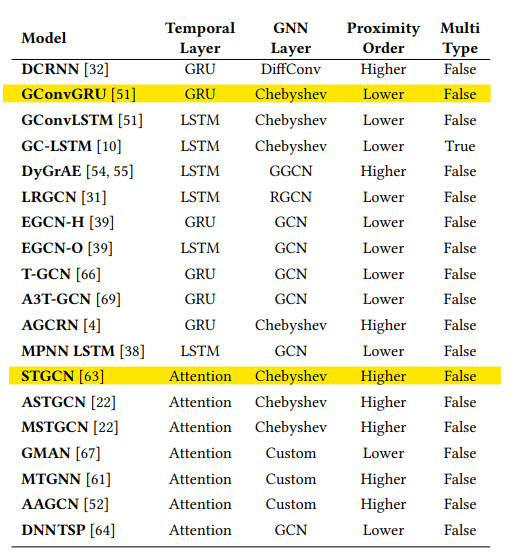

# Spatio-Temporal Graph Structure Learning for Traffic Forecasting

- [download](https://ojs.aaai.org/index.php/AAAI/article/view/5470/5326)

>Zhang, Qi, et al. "Spatio-temporal graph structure learning for traffic forecasting." Proceedings of the AAAI conference on artificial intelligence. Vol. 34. No. 01. 2020.